In [1]:
import pandas as pd
import numpy as np
%run plotFunctions.py

In [2]:
dataFile = pd.ExcelFile('GlobalWineMarketAnnual.xlsm')

In [3]:
tableToSheetmap = {'121': 'Sheet1', '122': 'Sheet2', '123': 'Sheet3', '132': 'Sheet12', '133': 'Sheet13',
                   '134': 'Sheet14', '135': 'Sheet15', '136': 'Sheet16', '138': 'Sheet18', '139': 'Sheet19',
                   '155': 'Sheet35'}
sheetToNamemap = {'121': 'Total grapevine bearing area',
                  '122': 'Share of world grapevine bearing area',
                  '123': 'Share of total agricultural crop under grapevine',
                  '132': 'Volume of wine production',
                  '133': 'Share of world wine production',
                  '134': 'Per capita wine production',
                  '135': 'Volume of wine production per $m of real GDP',
                  '136': 'Volume of wine consumption',
                  '138': 'Volume of wine consumption per capita',
                  '139': 'Volume of wine consumption per $m of real GDP',
                  '155': 'Share of wine in volume of total alcohol consumption %'}
sheetToUnitmap = {'121': "['000 Ha]",
                  '122': "[%]",
                  '123': "[%]",
                  '132': "[ML]",
                  '133': "[%]",
                  '134': "[L]",
                  '135': "[KL]",
                  '136': "[ML]",
                  '138': "[L]",
                  '139': "[KL]",
                  '155': "[%]"}

In [4]:
oldWorld = ['France', 'Italy', 'Spain', 'Portugal', 'Greece', 'Austria', 'Hungary', 'Germany',
            'Moldova', 'Georgia', 'Algeria']
newWorld = ['USA', 'Australia', 'Chile', 'Argentina', 'New Zealand', 'South Africa', 'Japan', 'India', 'China']
oldWorldWithoutItaly = oldWorld.copy()
oldWorldWithoutItaly.remove('Italy')
years = ['1860-69', '1870-79', '1880-89', '1890-99', '1900-09', '1910-19', '1920-29', '1930-39', '1940-49',
         '1950-59', '1960-69', '1970-79', '1980-89', '1990-99', '2000-09', '2010-16']

In [5]:
allDatasets = {}
for table, sheet in tableToSheetmap.items():
    allDatasets[table] = dataFile.parse(sheet_name=sheet, index_col=None, usecols='B:S', skiprows=2)
    allDatasets[table].rename(columns={"Unnamed: 0": "Country"}, inplace=True)
    allDatasets[table].drop(columns='Unnamed: 1', inplace=True)
    allDatasets[table].dropna(subset=['Country'], inplace=True)
    allDatasets[table].dropna(how='all', inplace=True)
    allDatasets[table].replace('na', np.nan, inplace=True)

In [6]:
# data = pd.read_excel('GlobalWineMarketAnnual.xlsm', index_col=None, sheet_name=tableToSheetmap['121'], usecols='B:S', skiprows=2)
# data.rename(columns={"Unnamed: 0": "Country"}, inplace=True)
# data.drop(columns='Unnamed: 1', inplace=True)
# data.dropna(subset=['Country'], inplace=True)
# data.dropna(how='all', inplace=True)
# data.replace('na', np.nan, inplace=True)

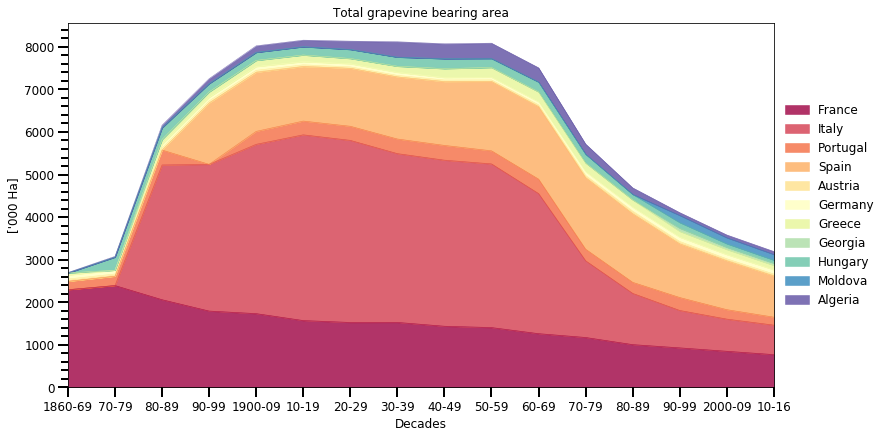

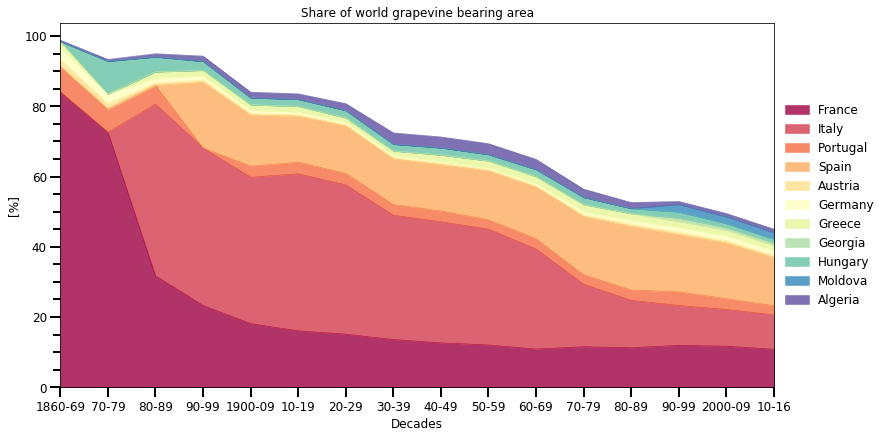

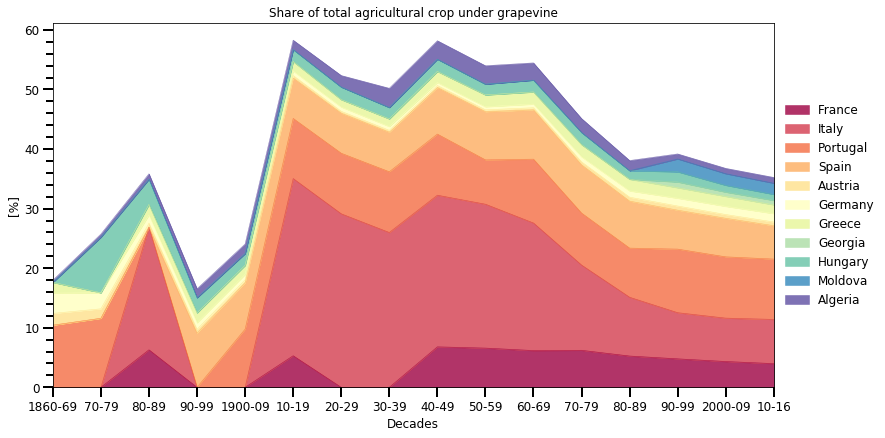

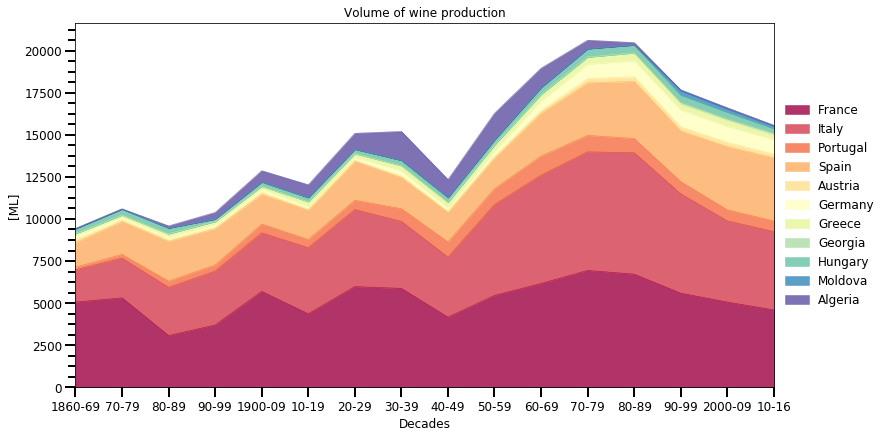

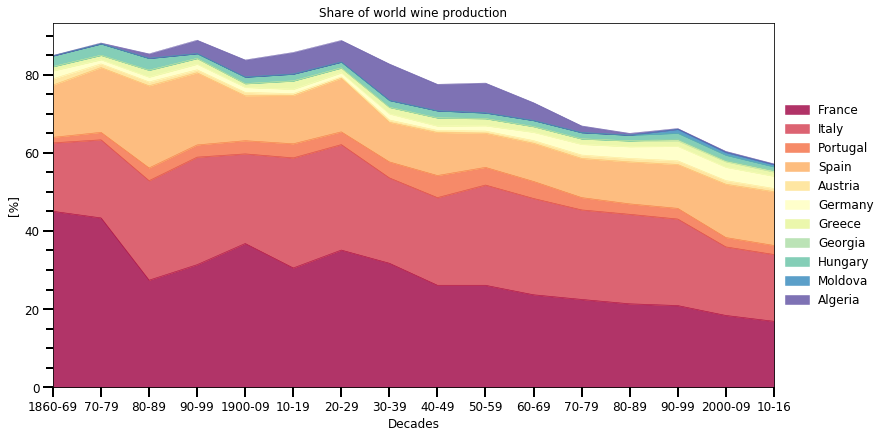

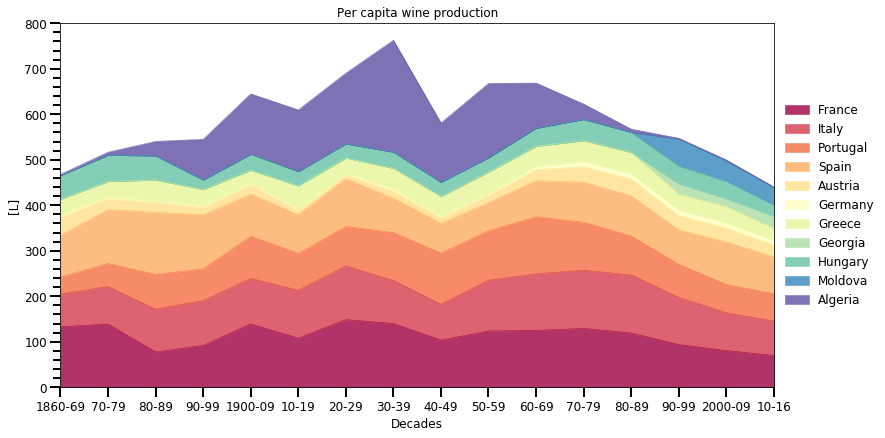

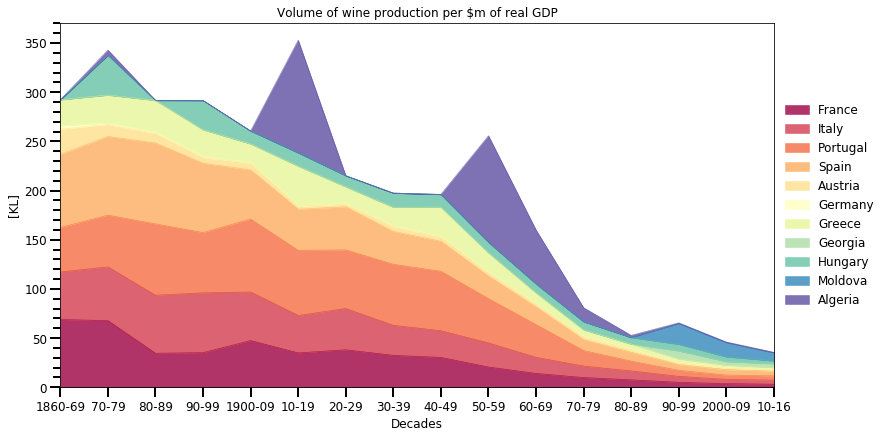

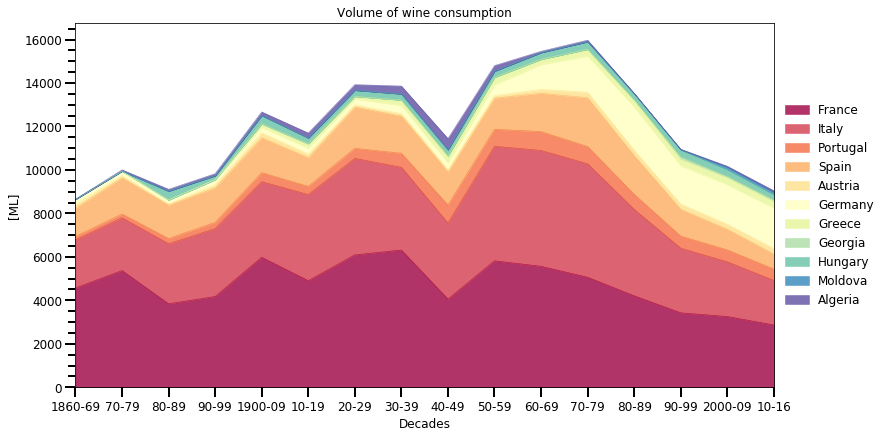

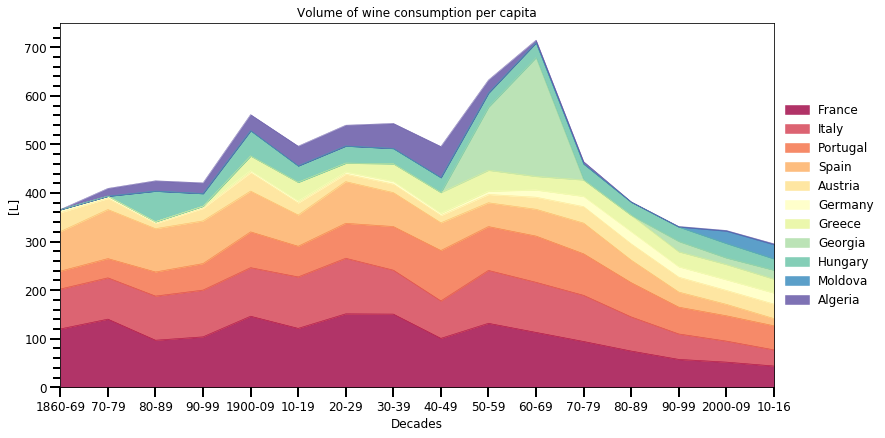

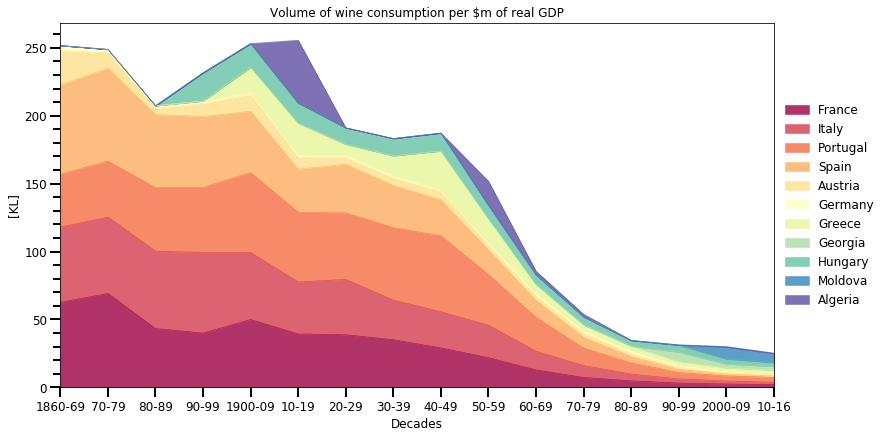

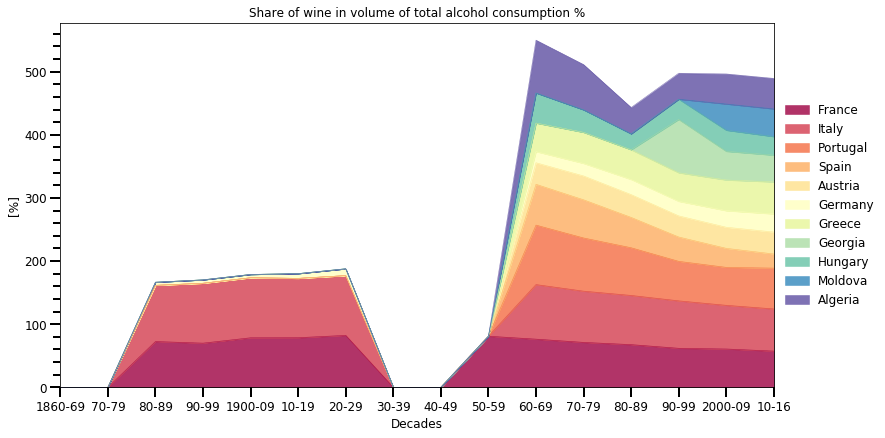

In [9]:
for table, dataset in allDatasets.items():
    createStackedBar(dataset, oldWorld, years, pltTitle = sheetToNamemap[table],
                     yTitle = sheetToUnitmap[table])

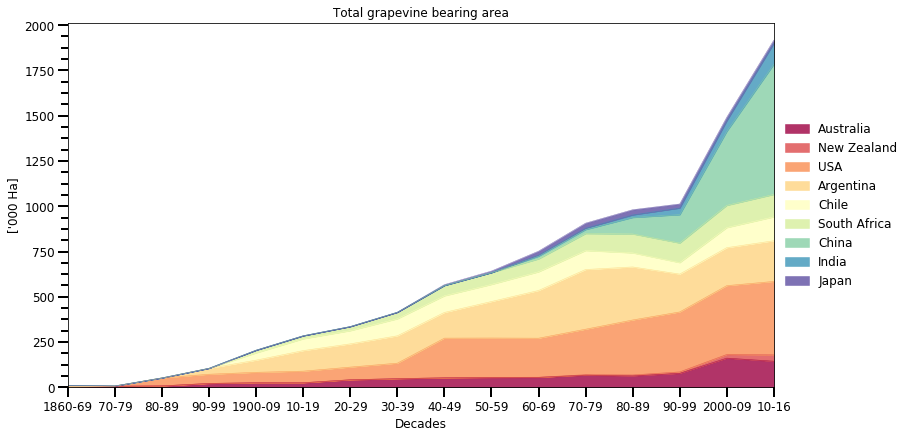

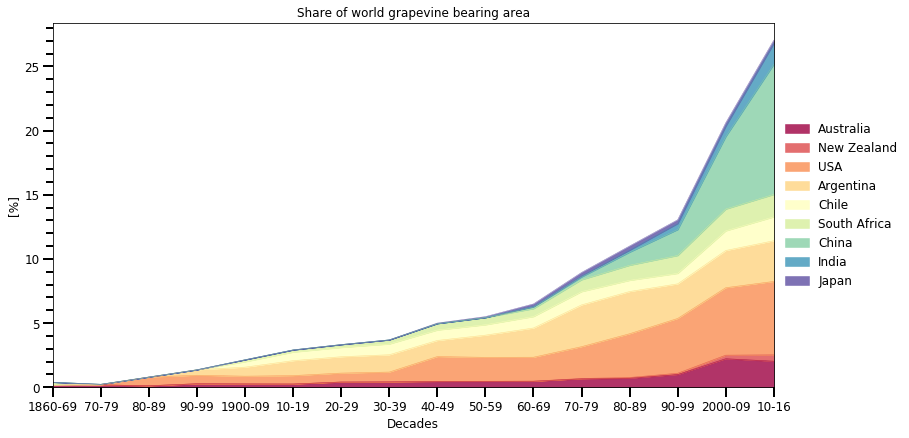

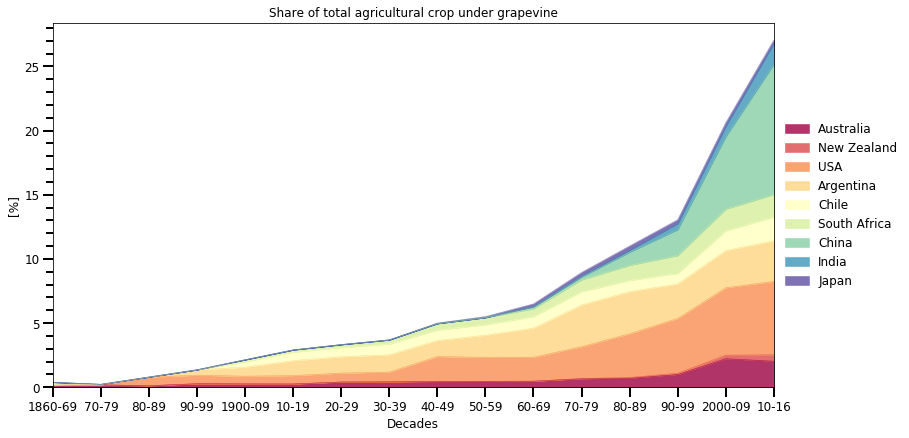

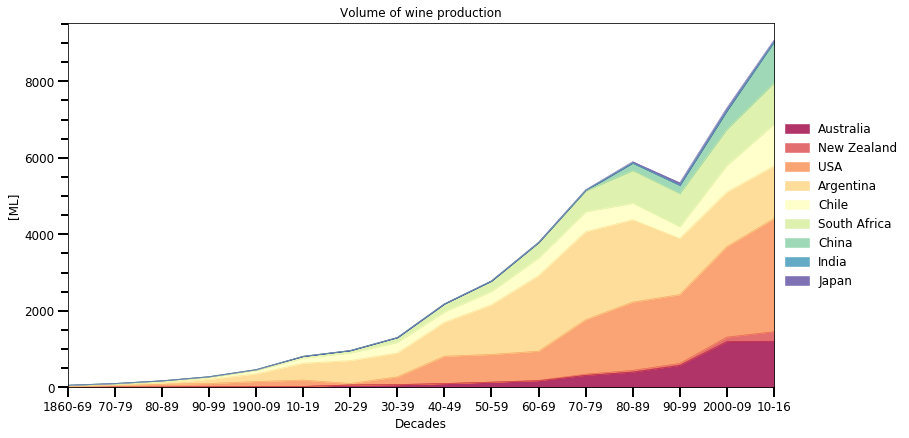

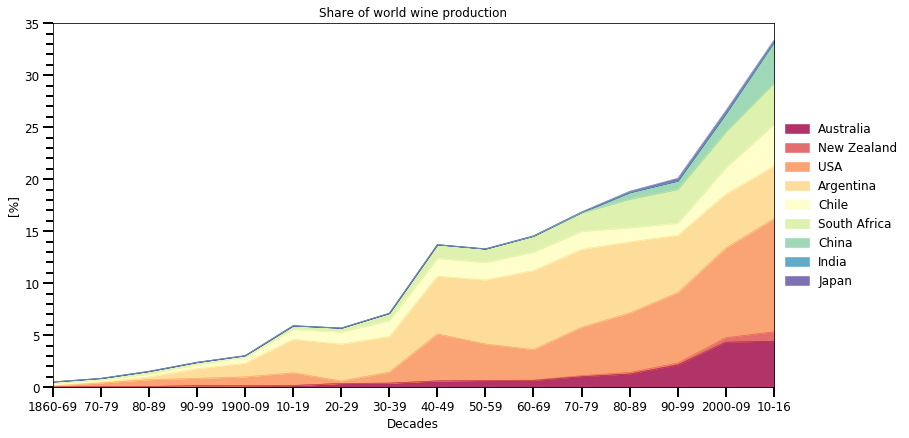

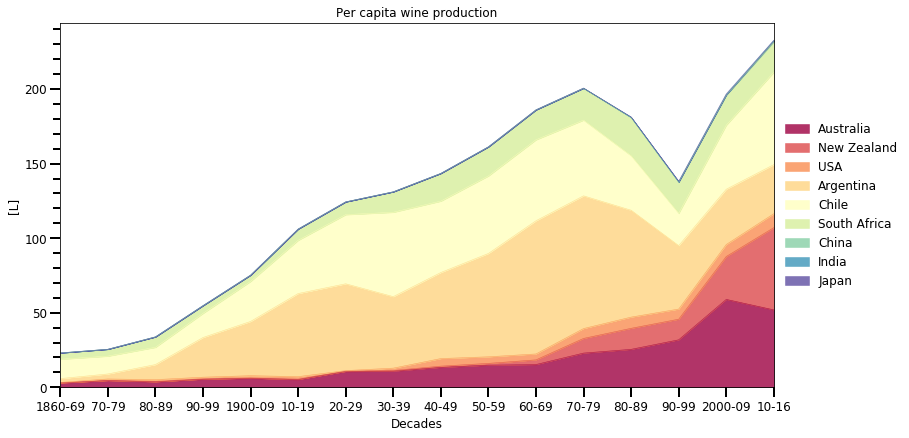

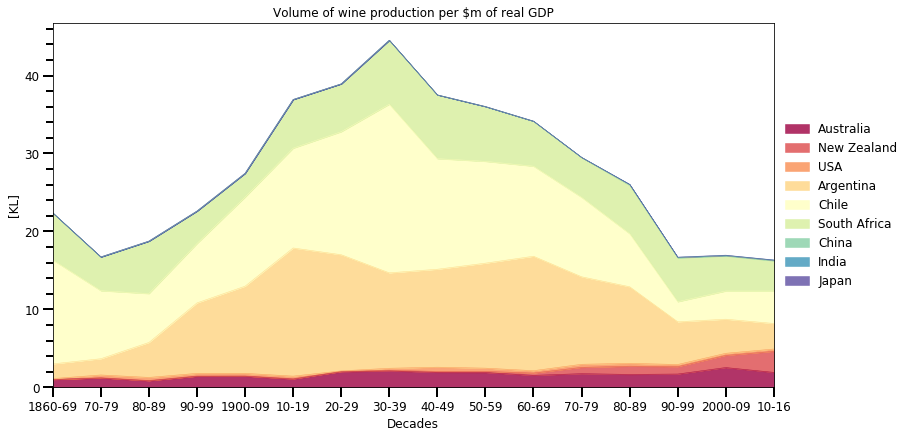

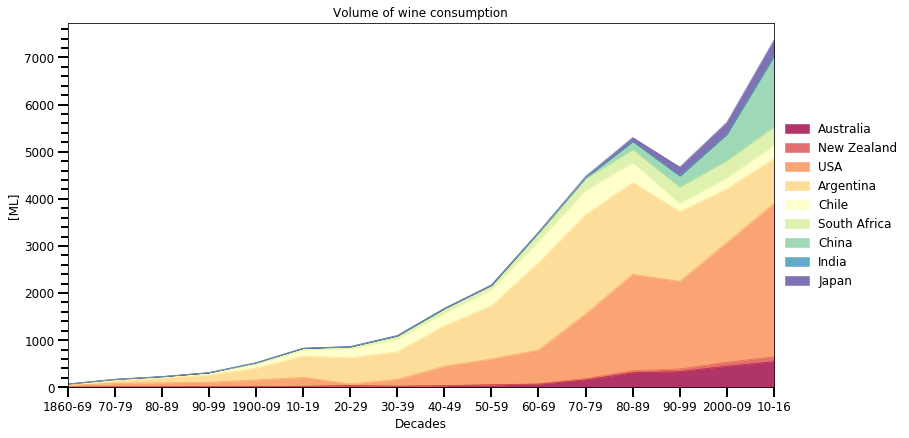

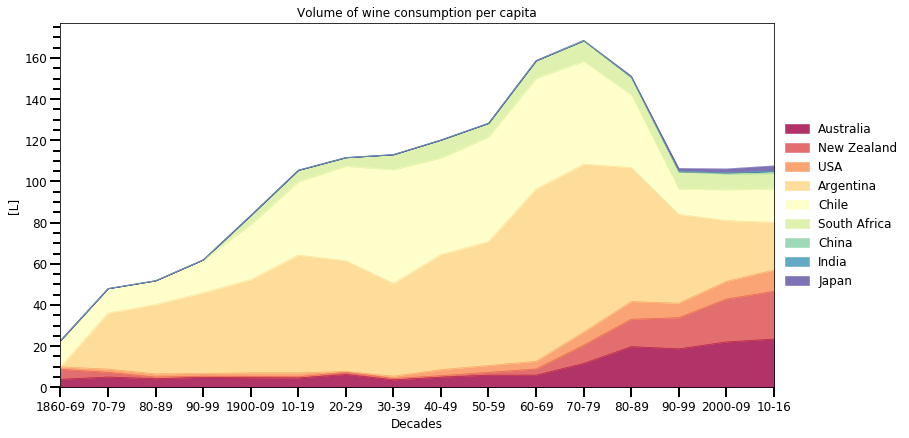

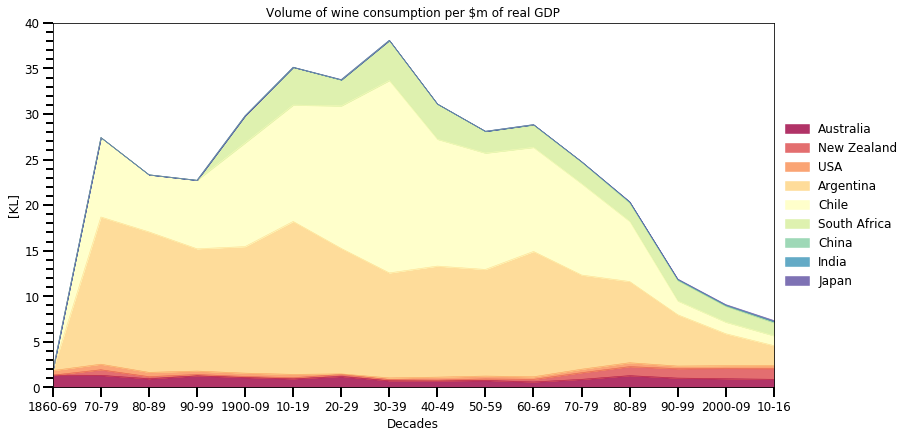

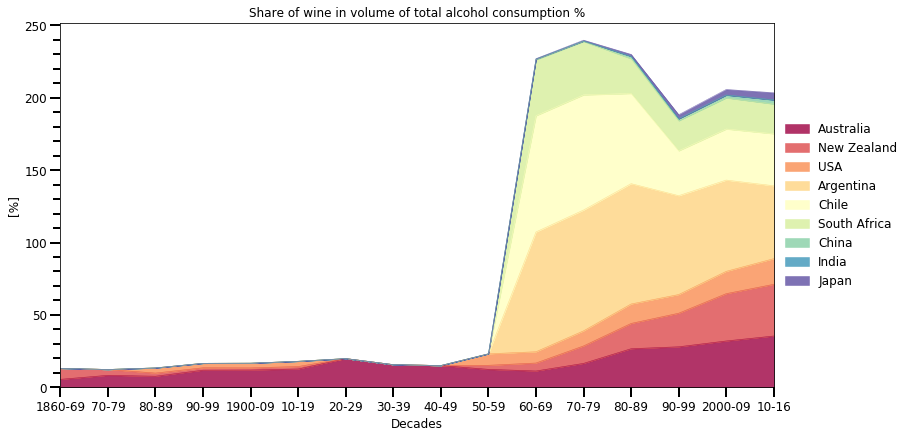

In [10]:
for table, dataset in allDatasets.items():
    createStackedBar(dataset, newWorld, years, pltTitle = sheetToNamemap[table],
                     yTitle = sheetToUnitmap[table])